# 프로그래밍3 프로젝트

소프트웨어응용학부 201904026 김수미

## 1. 데이터에 대한 설명

우선 제가 쓸 데이터는 https://github.com/choosunsick/KBO_data 에서 가지고 온 프로야구 데이터입니다.
<br>이 중에서 2010년부터 2018년까지의 KBO 경기 결과를 합쳐놓은 KBO_light 데이터를 사용합니다.
<br>
<br>

## 2. 데이터 탐색 및 분석 포인트 설명

### 2.1 데이터 탐색 

데이터 탐색을 하기 전에 우선 필요한 것들을 import 해줍니다.

In [1]:
import pandas as pd
import numpy as np

그 다음, data 파일에 저장해놓은 KBO_light 데이터를 가지고 와서 head 함수를 이용하여 데이터를 확인합니다.

In [2]:
baseball = pd.read_csv('data/KBO_light.csv')

In [3]:
baseball.head()

,Date,구장,원정팀,원정팀점수,홈팀점수,홈팀,원정팀결과,홈팀결과,비고
0,2010-03-06 13:00,목동,LG,3,2,넥센,승,패,시범경기
1,2010-03-06 13:00,문학,두산,5,0,SK,승,패,시범경기
2,2010-03-06 13:00,대전,롯데,12,1,한화,승,패,시범경기
3,2010-03-06 13:00,무등,삼성,4,1,기아,승,패,시범경기
4,2010-03-07 13:00,목동,LG,1,2,넥센,패,승,시범경기


이 데이터는 날짜와 구장, 경기 팀과 점수 그리고 어떤 경기인지 알 수 있는 열로 구성되어 있다는 것을 알 수 있습니다.

In [4]:
# 행과 열의 수
baseball.shape

(6244, 9)

In [5]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6244 non-null   object
 1   구장      6244 non-null   object
 2   원정팀     6244 non-null   object
 3   원정팀점수   6244 non-null   int64 
 4   홈팀점수    6244 non-null   int64 
 5   홈팀      6244 non-null   object
 6   원정팀결과   6244 non-null   object
 7   홈팀결과    6244 non-null   object
 8   비고      6244 non-null   object
dtypes: int64(2), object(7)
memory usage: 439.2+ KB


In [6]:
baseball.describe().T

,count,mean,std,min,25%,50%,75%,max
원정팀점수,6244.0,5.086803,3.596966,0.0,2.0,4.0,7.0,25.0
홈팀점수,6244.0,5.036195,3.433397,0.0,2.0,4.0,7.0,22.0


점수들은 int형인 것을 알 수 있고, describe() 함수를 통해 각 점수들의 평균값과 최소 최댓값을 알 수 있습니다.

In [7]:
baseball.describe(include=['object']).T

,count,unique,top,freq
Date,6244,1755,2016-03-22 13:00,5
구장,6244,17,잠실,1339
원정팀,6244,14,두산,722
홈팀,6244,14,삼성,695
원정팀결과,6244,3,패,3188
홈팀결과,6244,3,승,3188
비고,6244,7,정규시즌,5628


In [8]:
baseball.isnull().sum().sum()

0

결측치가 아예 없는 것을 확인할 수 있습니다.
<br>
<br>

### 2.2 분석 포인트

제가 응원하는 팀인 '롯데'를 중심으로 데이터 분석을 할 것입니다.
<br> 그렇기 때문에 데이터 전처리 과정에서 '롯데'에 해당되는 데이터들만 추출할 것입니다.

## 3. 데이터 분석

### 3.1 전처리 및 정제

In [9]:
baseball2 = pd.read_csv('data/KBO_light.csv', index_col='원정팀')

In [10]:
baseball3 = baseball2.loc['롯데',:]

In [11]:
baseball3

,Date,구장,원정팀점수,홈팀점수,홈팀,원정팀결과,홈팀결과,비고
원정팀,,,,,,,,
롯데,2010-03-06 13:00,대전,12,1,한화,승,패,시범경기
롯데,2010-03-07 13:00,대전,4,1,한화,승,패,시범경기
롯데,2010-03-09 13:00,대구,5,3,삼성,승,패,시범경기
롯데,2010-03-12 13:00,문학,2,1,SK,승,패,시범경기
롯데,2010-03-13 13:00,무등,8,6,기아,승,패,시범경기
...,...,...,...,...,...,...,...,...
롯데,2018-10-04 18:30,대전,7,2,한화,승,패,정규시즌
롯데,2018-10-07 14:00,마산,8,2,NC,승,패,정규시즌
롯데,2018-10-11 18:30,광주,4,0,기아,승,패,정규시즌


In [12]:
baseball4 = baseball3.reset_index(drop=True)

In [13]:
baseball4

,Date,구장,원정팀점수,홈팀점수,홈팀,원정팀결과,홈팀결과,비고
0,2010-03-06 13:00,대전,12,1,한화,승,패,시범경기
1,2010-03-07 13:00,대전,4,1,한화,승,패,시범경기
2,2010-03-09 13:00,대구,5,3,삼성,승,패,시범경기
3,2010-03-12 13:00,문학,2,1,SK,승,패,시범경기
4,2010-03-13 13:00,무등,8,6,기아,승,패,시범경기
...,...,...,...,...,...,...,...,...
660,2018-10-04 18:30,대전,7,2,한화,승,패,정규시즌
661,2018-10-07 14:00,마산,8,2,NC,승,패,정규시즌
662,2018-10-11 18:30,광주,4,0,기아,승,패,정규시즌
663,2018-10-12 18:30,광주,4,6,기아,패,승,정규시즌


In [14]:
baseball5 = baseball4.drop(columns = ['홈팀점수','홈팀결과','비고'])

In [15]:
baseball5

,Date,구장,원정팀점수,홈팀,원정팀결과
0,2010-03-06 13:00,대전,12,한화,승
1,2010-03-07 13:00,대전,4,한화,승
2,2010-03-09 13:00,대구,5,삼성,승
3,2010-03-12 13:00,문학,2,SK,승
4,2010-03-13 13:00,무등,8,기아,승
...,...,...,...,...,...
660,2018-10-04 18:30,대전,7,한화,승
661,2018-10-07 14:00,마산,8,NC,승
662,2018-10-11 18:30,광주,4,기아,승
663,2018-10-12 18:30,광주,4,기아,패


In [16]:
col_map = {'원정팀점수':'점수',
 '홈팀': '상대팀', '원정팀결과':'결과'}
baseball6 = baseball5.rename(columns=col_map)

In [17]:
baseball6

,Date,구장,점수,상대팀,결과
0,2010-03-06 13:00,대전,12,한화,승
1,2010-03-07 13:00,대전,4,한화,승
2,2010-03-09 13:00,대구,5,삼성,승
3,2010-03-12 13:00,문학,2,SK,승
4,2010-03-13 13:00,무등,8,기아,승
...,...,...,...,...,...
660,2018-10-04 18:30,대전,7,한화,승
661,2018-10-07 14:00,마산,8,NC,승
662,2018-10-11 18:30,광주,4,기아,승
663,2018-10-12 18:30,광주,4,기아,패


In [18]:
baseball6['홈원정'] = '원정'

In [19]:
baseball6

,Date,구장,점수,상대팀,결과,홈원정
0,2010-03-06 13:00,대전,12,한화,승,원정
1,2010-03-07 13:00,대전,4,한화,승,원정
2,2010-03-09 13:00,대구,5,삼성,승,원정
3,2010-03-12 13:00,문학,2,SK,승,원정
4,2010-03-13 13:00,무등,8,기아,승,원정
...,...,...,...,...,...,...
660,2018-10-04 18:30,대전,7,한화,승,원정
661,2018-10-07 14:00,마산,8,NC,승,원정
662,2018-10-11 18:30,광주,4,기아,승,원정
663,2018-10-12 18:30,광주,4,기아,패,원정


In [20]:
baseball7 = pd.read_csv('data/KBO_light.csv', index_col='홈팀')

In [21]:
baseball8 = baseball7.loc['롯데',:]

In [22]:
baseball8

,Date,구장,원정팀,원정팀점수,홈팀점수,원정팀결과,홈팀결과,비고
홈팀,,,,,,,,
롯데,2010-03-16 13:00,사직,LG,3,5,패,승,시범경기
롯데,2010-03-17 13:00,사직,LG,2,11,패,승,시범경기
롯데,2010-03-18 13:00,사직,넥센,3,5,패,승,시범경기
롯데,2010-03-19 13:00,사직,넥센,0,7,패,승,시범경기
롯데,2010-03-20 13:00,사직,두산,5,3,승,패,시범경기
...,...,...,...,...,...,...,...,...
롯데,2018-10-06 17:00,사직,한화,5,8,패,승,정규시즌
롯데,2018-10-09 14:00,사직,기아,10,11,패,승,정규시즌
롯데,2018-10-10 15:00,사직,KT,10,1,승,패,정규시즌


In [23]:
baseball9 = baseball8.reset_index(drop=True)

In [24]:
baseball10 = baseball9.drop(columns = ['원정팀점수','원정팀결과','비고'])

In [25]:
baseball10

,Date,구장,원정팀,홈팀점수,홈팀결과
0,2010-03-16 13:00,사직,LG,5,승
1,2010-03-17 13:00,사직,LG,11,승
2,2010-03-18 13:00,사직,넥센,5,승
3,2010-03-19 13:00,사직,넥센,7,승
4,2010-03-20 13:00,사직,두산,3,패
...,...,...,...,...,...
689,2018-10-06 17:00,사직,한화,8,승
690,2018-10-09 14:00,사직,기아,11,승
691,2018-10-10 15:00,사직,KT,1,패
692,2018-10-10 18:22,사직,KT,0,패


In [26]:
col_map = {'홈팀점수':'점수',
 '원정팀': '상대팀', '홈팀결과':'결과'}
baseball11 = baseball10.rename(columns=col_map)

In [27]:
baseball11['홈원정'] = '홈'

In [28]:
baseball11

,Date,구장,상대팀,점수,결과,홈원정
0,2010-03-16 13:00,사직,LG,5,승,홈
1,2010-03-17 13:00,사직,LG,11,승,홈
2,2010-03-18 13:00,사직,넥센,5,승,홈
3,2010-03-19 13:00,사직,넥센,7,승,홈
4,2010-03-20 13:00,사직,두산,3,패,홈
...,...,...,...,...,...,...
689,2018-10-06 17:00,사직,한화,8,승,홈
690,2018-10-09 14:00,사직,기아,11,승,홈
691,2018-10-10 15:00,사직,KT,1,패,홈
692,2018-10-10 18:22,사직,KT,0,패,홈


In [29]:
baseball6

,Date,구장,점수,상대팀,결과,홈원정
0,2010-03-06 13:00,대전,12,한화,승,원정
1,2010-03-07 13:00,대전,4,한화,승,원정
2,2010-03-09 13:00,대구,5,삼성,승,원정
3,2010-03-12 13:00,문학,2,SK,승,원정
4,2010-03-13 13:00,무등,8,기아,승,원정
...,...,...,...,...,...,...
660,2018-10-04 18:30,대전,7,한화,승,원정
661,2018-10-07 14:00,마산,8,NC,승,원정
662,2018-10-11 18:30,광주,4,기아,승,원정
663,2018-10-12 18:30,광주,4,기아,패,원정


In [30]:
giants = pd.concat([baseball6, baseball11])

In [31]:
giants

,Date,구장,점수,상대팀,결과,홈원정
0,2010-03-06 13:00,대전,12,한화,승,원정
1,2010-03-07 13:00,대전,4,한화,승,원정
2,2010-03-09 13:00,대구,5,삼성,승,원정
3,2010-03-12 13:00,문학,2,SK,승,원정
4,2010-03-13 13:00,무등,8,기아,승,원정
...,...,...,...,...,...,...
689,2018-10-06 17:00,사직,8,한화,승,홈
690,2018-10-09 14:00,사직,11,기아,승,홈
691,2018-10-10 15:00,사직,1,KT,패,홈
692,2018-10-10 18:22,사직,0,KT,패,홈


In [32]:
giants = giants.astype({'Date': 'datetime64', '점수' : 'int8'})

In [33]:
giants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1359 non-null   datetime64[ns]
 1   구장      1359 non-null   object        
 2   점수      1359 non-null   int8          
 3   상대팀     1359 non-null   object        
 4   결과      1359 non-null   object        
 5   홈원정     1359 non-null   object        
dtypes: datetime64[ns](1), int8(1), object(4)
memory usage: 65.0+ KB


In [34]:
giants = giants.sort_index()

In [35]:
giants.head(15)

,Date,구장,점수,상대팀,결과,홈원정
0,2010-03-06 13:00:00,대전,12,한화,승,원정
0,2010-03-16 13:00:00,사직,5,LG,승,홈
1,2010-03-17 13:00:00,사직,11,LG,승,홈
1,2010-03-07 13:00:00,대전,4,한화,승,원정
2,2010-03-09 13:00:00,대구,5,삼성,승,원정
2,2010-03-18 13:00:00,사직,5,넥센,승,홈
3,2010-03-12 13:00:00,문학,2,SK,승,원정
3,2010-03-19 13:00:00,사직,7,넥센,승,홈
4,2010-03-20 13:00:00,사직,3,두산,패,홈
4,2010-03-13 13:00:00,무등,8,기아,승,원정


### 3.2 데이터 분석 및 시각화

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')

%matplotlib inline

#### (1) 팀별 결과 비교

<AxesSubplot:xlabel='count', ylabel='상대팀'>

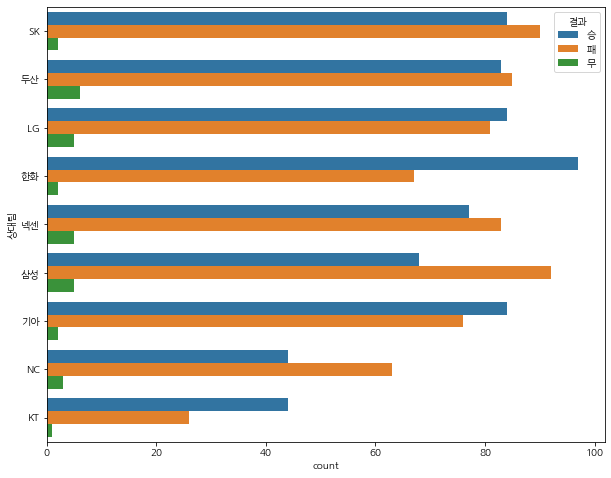

In [37]:
ig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='상대팀',hue='결과', order=giants.상대팀.value_counts().index,
 data=(giants))

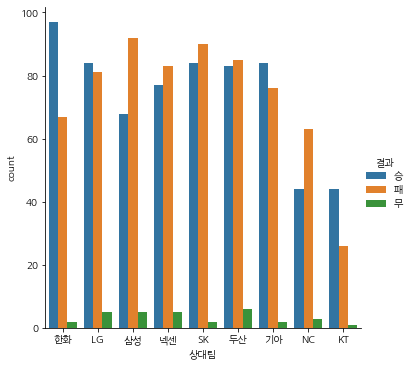

In [38]:
sns.catplot(
 kind='count', x='상대팀', hue='결과', data=giants
)

<AxesSubplot:xlabel='상대팀'>

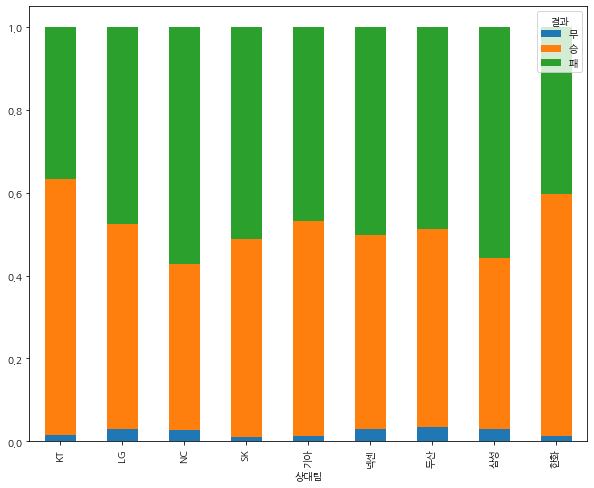

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
(
 giants.pipe(
 lambda df_: pd.crosstab(giants.상대팀, giants.결과)
 )
 .pipe(lambda giants: giants.div(giants.sum(axis=1), axis=0))
 .plot.bar(stacked=True, ax=ax)
)


#### (2) 연도별 결과 비교

In [40]:
(
 giants
 .groupby([giants['Date'].dt.year.rename('year'),
 giants['결과'].rename('result')])
 .size()
 .unstack()
)

result,무,승,패
year,,,
2010,3,81,66
2011,5,82,64
2012,6,73,75
2013,5,69,65
2014,2,62,75
2015,1,73,82
2016,3,69,89
2017,4,86,70
2018,2,70,77


<AxesSubplot:title={'center':'연도별 경기결과 '}, xlabel='year'>

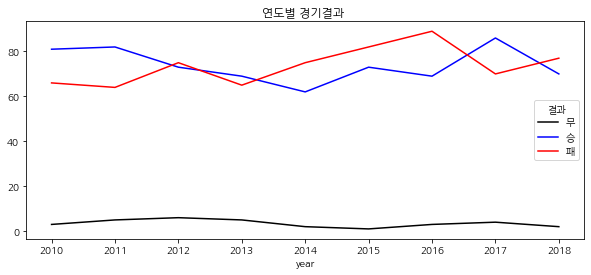

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))
(
 giants
 .groupby([giants['Date'].dt.year.rename('year'),
 giants['결과'].rename('결과')])
 .size()
 .unstack()
 .plot(color=['black', 'blue', 'red'], ax=ax, title='연도별 경기결과 ')
)

#### (3) 월별 결과 비교

In [42]:
(
 giants
 .groupby([giants['Date'].dt.month.rename('month'),
 giants['결과'].rename('result')])
 .size()
 .unstack()
)

result,무,승,패
month,,,
3,7.0,50.0,64.0
4,5.0,94.0,100.0
5,3.0,109.0,107.0
6,6.0,100.0,100.0
7,3.0,84.0,93.0
8,2.0,102.0,88.0
9,5.0,93.0,79.0
10,NaN,33.0,32.0


<AxesSubplot:title={'center':'월별 경기결과'}, xlabel='month'>

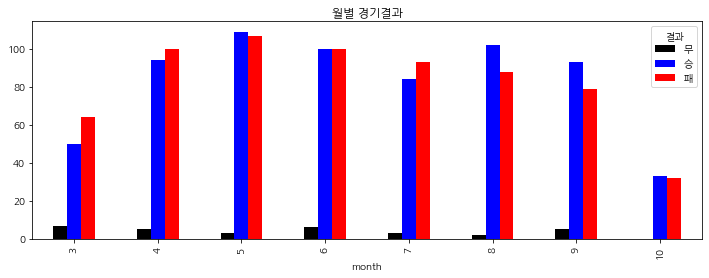

In [43]:
fig, ax = plt.subplots(figsize=(12, 4))
(
 giants
 .groupby([giants['Date'].dt.month.rename('month'),
 giants['결과'].rename('결과')])
 .size()
 .unstack()
 .plot(color=['black', 'blue', 'red'], ax=ax, title='월별 경기결과', kind='bar')
)

#### (4) 요일별 결과 비교

In [44]:
giants_sort = giants.set_index('Date').sort_index()

In [45]:
giants_sort

,구장,점수,상대팀,결과,홈원정
Date,,,,,
2010-03-06 13:00:00,대전,12,한화,승,원정
2010-03-07 13:00:00,대전,4,한화,승,원정
2010-03-09 13:00:00,대구,5,삼성,승,원정
2010-03-12 13:00:00,문학,2,SK,승,원정
2010-03-13 13:00:00,무등,8,기아,승,원정
...,...,...,...,...,...
2018-10-10 18:22:00,사직,0,KT,패,홈
2018-10-11 18:30:00,광주,4,기아,승,원정
2018-10-12 18:30:00,광주,4,기아,패,원정


In [46]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
(
 giants_sort.groupby(lambda idx: idx.day_name())
 .결과.value_counts()
 .unstack()
 .fillna(0)
 .reindex(days)
 .style.highlight_max(color='blue')
)

결과,무,승,패
Monday,0.000000,7.000000,8.000000
Tuesday,7.000000,113.000000,108.000000
Wednesday,4.000000,110.000000,109.000000
Thursday,8.000000,109.000000,101.000000
Friday,6.000000,101.000000,109.000000
Saturday,1.000000,111.000000,117.000000
Sunday,5.000000,114.000000,111.000000


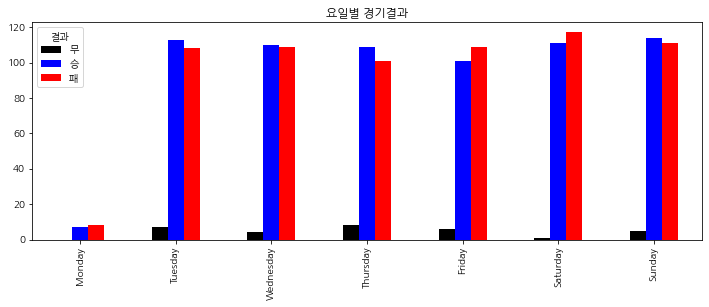

In [47]:
fig, ax = plt.subplots(figsize=(12, 4))
table = (
 giants_sort.groupby(lambda idx: idx.day_name())
 .결과.value_counts()
 .unstack()
 .fillna(0)
 .reindex(days)
 .plot(color=['black', 'blue', 'red'], ax=ax, title='요일별 경기결과', kind='bar')
)

#### (5) 구장별 결과 비교

<AxesSubplot:xlabel='count', ylabel='구장'>

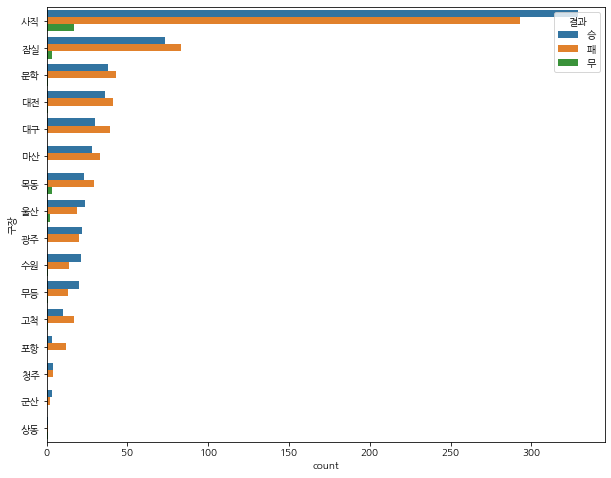

In [48]:
ig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='구장',hue='결과', order=giants.구장.value_counts().index,
 data=(giants))

#### (6) 홈 원정 결과 비교

<AxesSubplot:xlabel='홈원정', ylabel='count'>

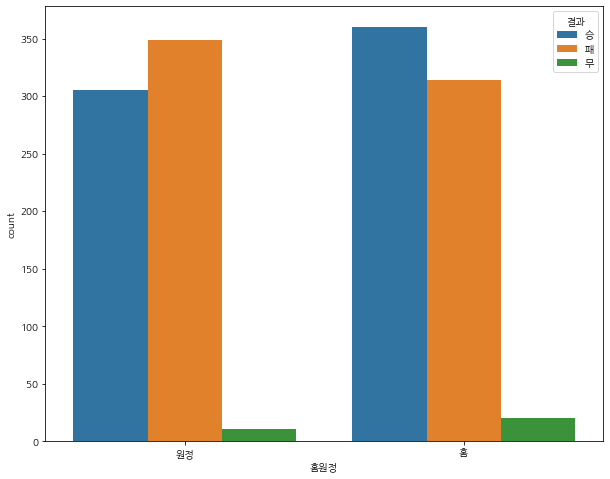

In [49]:
ig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='홈원정',hue='결과',
 data=(giants))

#### (7) 요일별 점수 분포

In [50]:
giants.점수.value_counts()

4     175
2     163
5     153
3     150
6     122
1     121
7      90
8      81
0      70
9      70
10     57
11     36
12     23
13     20
14      9
15      5
17      5
20      3
16      2
19      2
18      1
23      1
Name: 점수, dtype: int64

In [51]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
(
 giants_sort.groupby(lambda idx: idx.day_name())
 .점수.value_counts()
 .unstack()
 .fillna(0)
 .reindex(days)
 .transpose()
 .style.highlight_max(color='blue')
 
)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
점수,,,,,,,
0,1.000000,9.000000,12.000000,8.000000,14.000000,11.000000,15.000000
1,3.000000,20.000000,15.000000,18.000000,20.000000,21.000000,24.000000
2,0.000000,27.000000,32.000000,27.000000,20.000000,34.000000,23.000000
3,3.000000,28.000000,24.000000,18.000000,17.000000,30.000000,30.000000
4,1.000000,28.000000,24.000000,36.000000,30.000000,21.000000,35.000000
5,2.000000,36.000000,21.000000,28.000000,25.000000,24.000000,17.000000
6,0.000000,15.000000,25.000000,20.000000,18.000000,21.000000,23.000000
7,2.000000,15.000000,12.000000,14.000000,14.000000,18.000000,15.000000
8,1.000000,13.000000,11.000000,10.000000,18.000000,15.000000,13.000000


<br>

## 4. 의미 해석

(1)　　전체적으로 원정에서 열세입니다. 하지만 팀별로 봤을 때는 LG, 기아, 한화, KT팀들에게 우세를 나타내고 있는데, 
<br>　　　우세인 팀들도 수원을 제외한 다른 구장 원정에서는 약한 모습을 보이고 있습니다.

(2)　　2010년대 초반에는 승률이 5할이 넘어서 상위권 순위에 있었지만 2010년대 중반에는 승률이 5할이 넘지 않고 하위권에 머물렀습니다.
<BR>　　　=> 이걸 볼 때, 승률 5할만 넘어도 중위권은 할 수 있다고 생각합니다.

(3)　　6,7월에 성적을 보았을 때, 패가 더 많은 것을 보면 날씨가 더워지는 시점에 성적이 좋지 않은 것을 알 수 있습니다.
<BR>　　　=> 더워지는 날씨에 대한 대비를 충분히 해야 한다고 봅니다.

(4)　　전체적으로는 4점을 낸 날이 많지만 화요일은 5점을 낸 날이 많고 승리한 횟수도 많은 편입니다. 
<br>　　　화요일에 승률이 좋다고 할 수 있습니다.


<BR>하지만, 무조건적으로 점수를 가지고 승패를 생각할 순 없습니다. 
+ 상대팀과의 점수 차에 따른 승률 
+ 일정 점수 이상 됐을 때 승률
+ 몇 회일 때 몇 점 이상인 경우 승률
<br>  등으로 승률을 분석해볼 수 있습니다.

## 5. 느낀 점

- 좋아하는 분야에 대해서 분석을 하다보니 더 흥미가 있었습니다.<br>
- 지금 분석했던 것 뿐만 아니라 다음에는 또 다른 시각으로 분석을 해보고 싶습니다. <br>
- 그리고 분석을 하다보니 우리팀이 잘했던 시기가 벌써 거의 10년 전이라서 너무 안타까웠습니다.